# Figure 2 individual participant data for experiments 1, 2, and 3

___

In [70]:
import pickle
import numpy as np 
import re 
from pathlib import Path
import pandas as pd
import json
import pickle
import importlib 
import IPython.display as ipd
%matplotlib inline 

import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats 

import src.util_process_prolific as up 
from src import util_analysis
from tqdm import tqdm
importlib.reload(up)

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [73]:
outdir = Path("rebuttal_figs")
outdir.mkdir(parents=True, exist_ok=True)

# Load data


In [ ]:
### Load data

human_data = pd.read_pickle('data/summary_2024_SWC_diotic_indiv_participant_results_195.pdpkl')
human_data['group'] = f'Human (N = {human_data.id_subject.nunique()})'

# rename human_df columns to match fba_models
human_data = human_data.rename(columns={'correct_mean': 'correct',
                                        'confusions_mean': 'confs',
                                        'adjusted_confusions_mean': 'confusions',
                                        'adjusted_accuracy_mean': 'accuracy',
                                         'condition': 'background_condition',
                                         })

# rename backcround condition stationary to noise 
human_data['background_condition'] = human_data['background_condition'].replace({'stationary': 'noise',
                                                                                 
                                                                                 })

## Get sex and lang summary 
### Load data

human_data = pd.read_pickle('data/summary_2024_SWC_diotic_indiv_participant_results_195.pdpkl')
human_data['group'] = f'Human (N = {human_data.id_subject.nunique()})'

# rename human_df columns to match fba_models
human_data = human_data.rename(columns={'correct_mean': 'correct',
                                        'confusions_mean': 'confs',
                                        'adjusted_confusions_mean': 'confusions',
                                        'adjusted_accuracy_mean': 'accuracy',
                                         'condition': 'background_condition',
                                         })

# drop mandarin from this df 
human_data = human_data[~human_data.background_condition.str.contains('Mandarin')]
# rename backcround condition stationary to noise 
human_data['background_condition'] = human_data['background_condition'].replace({'stationary': 'noise'})
                 
                 ### Load data

human_sex_data = pd.read_pickle('data/summary_2024_SWC_diotic_sex_lang_summary_indiv_participant_results_195.pdpkl')
human_sex_data['group'] = f'Human (N = {human_sex_data.id_subject.nunique()})'

# rename human_df columns to match fba_models
human_sex_data = human_sex_data.rename(columns={'accuracy': 'correct',
                                        'confusions': 'confs',
                                        'adjusted_confusions': 'confusions',
                                        'adjusted_accuracy': 'accuracy',
                                         })


human_sex_data['background_condition'] = human_sex_data['background_condition'].replace({'Clean': 'clean'})

human_data = pd.concat([human_data, human_sex_data], axis=0, ignore_index=True) 


In [4]:
human_data.background_condition.unique() #head()

array(['1-talker', '2-talker', '4-talker', 'babble', 'music',
       'natural scene', 'noise', 'clean', 'Different', 'Same', 'English',
       'Mandarin'], dtype=object)

In [ ]:
### Set up color palette 
popham_conds_to_keep = ['Harmonic_target_Harmonic_distractor',
                        'Harmonic_target_No Distractor_distractor',
                        'Inharmonic_target_Inharmonic_distractor',
                        'Inharmonic_target_No Distractor_distractor',
                        'Whispered_target_No Distractor_distractor',
                        'Whispered_target_Whispered_distractor']
# add colors for diotic experimental conditions 
hue_order = ['clean', '1-talker',  '2-talker',  '4-talker', 'babble'] # 'noise',  'music', 'natural scene']
palette={}
palette['clean'] = 'k'

# set speech color gradient 
speech_palette = sns.color_palette("RdPu_r")
speech_order = hue_order[1:][::-1]

for ix, group in enumerate(speech_order):
    palette[group] = speech_palette[ix]

# add colors for noise conditions 
noise_order = ['noise',  'music', 'natural scene']
noise_palette = sns.color_palette("YlOrBr_r", n_colors=6)
noise_order = noise_order[::-1]

for ix, group in enumerate(noise_order):
    palette[group] = noise_palette[ix]

# add same and different sex color palette 
hue_order = ['Different', 'Same']
sex_palette = dict(zip(hue_order, sns.color_palette(palette='colorblind', n_colors=10, as_cmap=False)))
palette['Same'] = sex_palette['Same']
palette['Different'] = 'tab:cyan'
palette['English'] = 'tab:pink'
palette['Mandarin'] = 'seagreen'

# add popham conditions 
for cond in popham_conds_to_keep: 
    if 'No Distractor' in cond:
        palette[cond] = 'k'
    else:
        palette[cond] = 'b'

confusion_palette = {k:v for k, v in palette.items()}
# add popham conditions 
for cond in popham_conds_to_keep: 
    if 'No Distractor' in cond:
        confusion_palette[cond] = 'k'
    else:
        confusion_palette[cond] = 'r'


In [52]:
human_data.id_subject.nunique()

195

In [ ]:
col_order = [
 'clean',
 '1-talker',
 '2-talker',
 '4-talker',
 'babble',
 'Mandarin',
 'Same',
 'Different',
 'noise',
 'natural scene',
 'music',
 ]


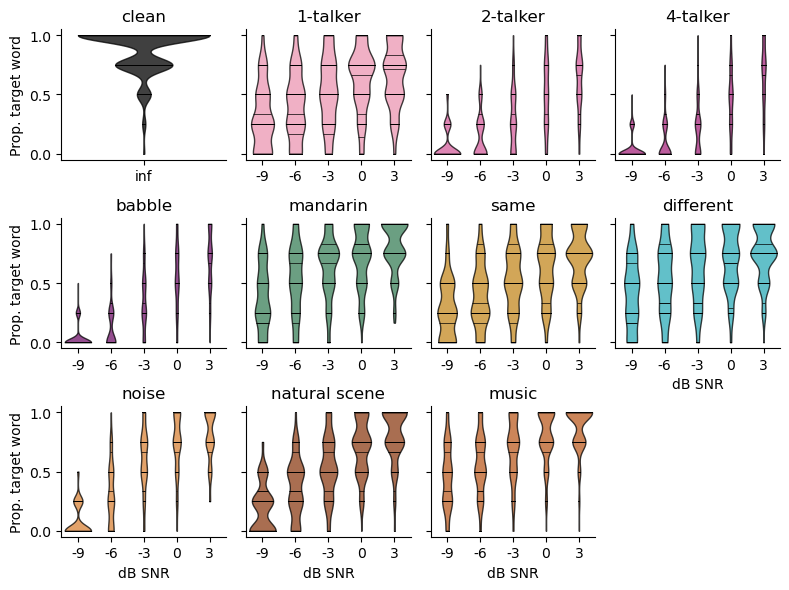

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
to_plot = human_data.copy()
to_plot['background_condition'] = to_plot['background_condition'].replace({'Mandarin distractor': 'Mandarin'})
to_plot.snr = to_plot.snr.astype(str)
to_plot.loc[to_plot['snr'] == '6', 'snr'] = 'inf'  

snr_ticks = sorted(to_plot['snr'].unique())


# Create relplot (lineplot per condition)
g = sns.catplot(
    data=to_plot,
    x="snr", y="accuracy",
    col="background_condition",
    col_order=col_order,
    hue="background_condition",
    palette=palette,             # Use provided palette dict
    kind="violin",
    # errorbar=("se", 2),          # Standard error
    # zorder=4,
    col_wrap=4,
    height=2,
    # aspect=1,
    sharex=False,
    alpha=0.75,
    cut=0,
    # aspect=0.75,
    legend=False,
    linewidth=1,
    inner="stick",
    # bw_adjust=.5,
)
# g.set(xticks=snr_ticks)

# Final plot formatting
g.set_titles("{col_name}")
for ax in g.axes.flat:
    title = ax.get_title()
    ax.set_title(title.lower())

g.set_axis_labels("dB SNR", "Prop. target word")
# g.tight_layout()

# plt.savefig(outdir / 'exp_1_human_diotic_conditions_accuracy_violins.pdf', transparent=True,  bbox_inches='tight')


## Plot confusions

In [ ]:
same_v_diff_sex_confusion_data = pd.read_csv("data/summary_2024_SWC_diotic_same_v_diff_sex_confusions_indiv_participant_results_195.csv", index_col=0)
same_v_diff_sex_confusion_data.head()
same_v_diff_sex_confusion_data['background_condition'] = same_v_diff_sex_confusion_data['sex_cond']
# rename columns 
same_v_diff_sex_confusion_data = same_v_diff_sex_confusion_data.rename(columns={'correct_mean': 'correct',
                                        'confusions_mean': 'confs',
                                        'adjusted_confusions_mean': 'confusions',
                                        'adjusted_accuracy_mean': 'accuracy',
                                         'condition': 'background_condition',
                                         })

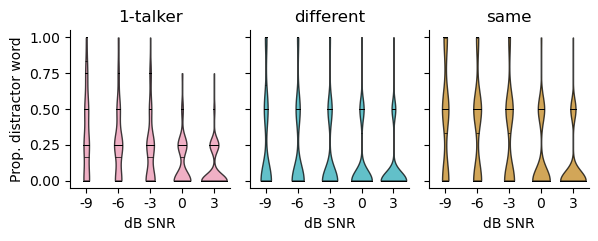

In [74]:
one_talker_confusions = human_data[human_data.background_condition == '1-talker'].reset_index(drop=True)
to_plot = pd.concat([one_talker_confusions, same_v_diff_sex_confusion_data], axis=0, ignore_index=True)

g = sns.catplot(
    data=to_plot,
    x="snr", y="confusions",
    col="background_condition",
    # col_order=col_order,
    hue="background_condition",
    palette=palette,             # Use provided palette dict
    kind="violin",
    height=2.5,
    # aspect=1,
    sharex=False,
    alpha=0.75,
    cut=0,
    aspect=.8,
    legend=False,
    linewidth=1,
    inner="stick",

)
xticklabels = list(to_plot.snr.unique())
xticklabels[-1] = 'inf'
# Reduce the frequency of the x axis ticks
# g.set(xticks=to_plot.snr.unique(), xticklabels=xticklabels)

# Tweak the supporting aspects of the plot
g.set_titles("{col_name}")
for ax in g.axes.flat:
    title = ax.get_title()
    ax.set_title(title.lower())

g.set_axis_labels("dB SNR", "Prop. distractor word")

# plt.savefig(outdir / 'exp_1_human_diotic_conditions_confusions_violins.pdf', transparent=True,  bbox_inches='tight')
# 

## Plot results from Experiment 2

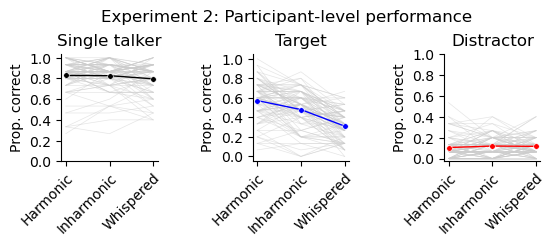

In [ ]:
exp_2_participant_df = pd.read_csv('data/experiment_2_df_for_plot_and_stats.csv')
exp_2_participant_df = exp_2_participant_df[exp_2_participant_df.group.str.contains('Humans')]

exp_2_to_plot = exp_2_participant_df[(exp_2_participant_df.target_harmonicity == exp_2_participant_df.distractor_harmonicity) | (exp_2_participant_df.distractor_harmonicity == 'No Distractor')]

no_dist_IXS = exp_2_to_plot[exp_2_to_plot.distractor_harmonicity == 'No Distractor'].index.values
exp_2_to_plot.loc[no_dist_IXS, 'distractor_harmonicity'] = exp_2_to_plot.loc[no_dist_IXS, 'target_harmonicity'] 
exp_2_to_plot = exp_2_to_plot[exp_2_to_plot.distractor_harmonicity != 'No Distractor']

hues = ['k', 'b', 'r']
hue_order = ['Single sentence', 'Target', 'Distractor']

palette = {'Target': 'b', 'Distractor': 'r', 'Single sentence': 'k'}

fontsize=10
tick_fontsize = 10
# fontsize = 10
err_band_alpha = 0.2

yticks = np.linspace(0,1,6).round(1)

xtick_labels = exp_2_to_plot.distractor_harmonicity.unique()
xticks = np.arange(len(xtick_labels))
ratio = 1.0 
line_thickness = 1

g = sns.relplot(
    data=exp_2_to_plot,
    x="distractor_harmonicity",
    y="hits",
    col="attended_stream",
    col_order=hue_order,
    hue="attended_stream",
    palette=palette,  #hue_order=hue_order,
    kind="line",
    zorder=4, #human_data
    marker='.', 
    markersize=8,
    markeredgewidth=.4,
    linewidth=1,
    errorbar=None,#("se", 1), 
    facet_kws={'sharex': False,
               'sharey': False},
    # col_wrap=4,
    height=2,
    aspect=1,
    legend=False,
)


for attended_stream, ax in g.axes_dict.items():
    sns.lineplot(
        data=exp_2_to_plot[exp_2_to_plot.attended_stream==attended_stream],
        x="distractor_harmonicity",
        y="hits",
        units="id_subject",
        estimator=None, 
        color=".8",
        linewidth=0.5,
        zorder=1,
        alpha=0.5,
        ax=ax,
    )

g.set_titles("{col_name}")
for ax in g.axes.flat:
    title = ax.get_title().title()
    if "Single" in title:
        title = title.replace("Sentence", "talker")
    ax.set_title(title)

# rotate xtick labels
for ax in g.axes.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=tick_fontsize)
    ax.set_xlabel('', fontsize=fontsize)
    ax.set_ylabel('Prop. correct', fontsize=fontsize)
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # ax.set_ylim([0, 1])
    # ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    # ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=tick_fontsize)
plt.suptitle('Experiment 2: Participant-level performance', fontsize=12, y=1.05)

# plt.savefig(outdir / 'exp_2_human_diotic_conditions.pdf', transparent=True,  bbox_inches='tight')

    


## Add experiment 3

In [ ]:
exp_3_human_df = pd.read_csv('data/human_data_saddler_2023_speech_in_synthetic_textures.csv', index_col=0)
texture_manifest  = pd.read_pickle('/om2/user/msaddler/spatial_audio_pipeline/assets/human_experiment_v00/synthetic_textures/manifest.pdpkl')
texture_ix_map = {item.index_texture:item.label for item in texture_manifest[['index_texture', 'label']].drop_duplicates().itertuples()}
exp_3_human_df['texture_label'] = exp_3_human_df['index_texture'].map(texture_ix_map)
exp_3_human_df = exp_3_human_df.rename(columns={'correct_word': 'accuracy'})

texture_order = exp_3_human_df.groupby('texture_label')['accuracy'].mean().sort_values(ascending=False).index

exp_3_human_df.head()

,index_texture,snr,accuracy,fn_eval,tag_expt,tag_model,texture_label
0,0.0,-3.0,0.444444,566a4cf27da0350012b4582d,speech_in_synthetic_textures,human,16mm_projector
1,1.0,-3.0,0.555556,566a4cf27da0350012b4582d,speech_in_synthetic_textures,human,airplane_engine
2,2.0,-3.0,1.000000,566a4cf27da0350012b4582d,speech_in_synthetic_textures,human,airplane_yout
3,3.0,-3.0,0.625000,566a4cf27da0350012b4582d,speech_in_synthetic_textures,human,alarm_bell
4,4.0,-3.0,0.444444,566a4cf27da0350012b4582d,speech_in_synthetic_textures,human,applause_large_crowd


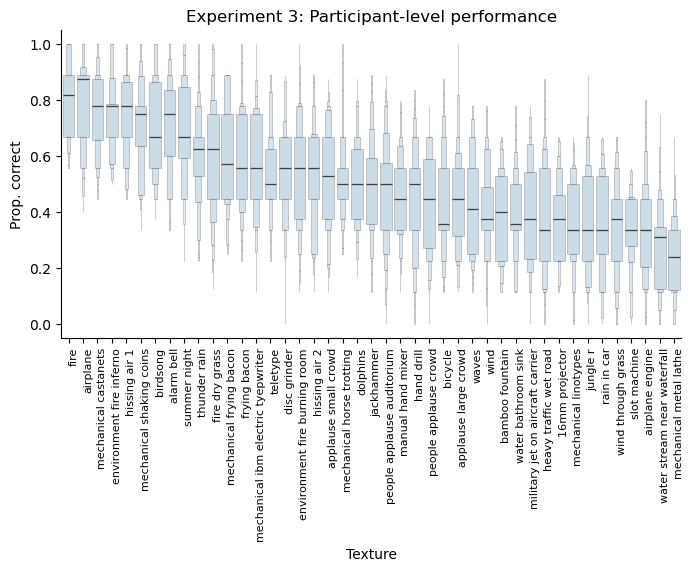

In [47]:


fig, axs = plt.subplots(1, figsize=(8,4))

sns.boxenplot(
   data=exp_3_human_df,
    x="texture_label",
    order=texture_order,
    y="accuracy",
    k_depth='full',
    alpha=.25, zorder=1, legend=False,
)

sns.despine()


# rotate xtick labels
xticklabels = [label.replace('_', ' ').replace(' yout', '') for label in texture_order]
axs.set_xticks(np.arange(len(xticklabels)))
axs.set_xticklabels(xticklabels, rotation=90, ha='right', rotation_mode='anchor', fontsize=8);
axs.set_ylabel('Prop. correct', fontsize=10)
axs.set_xlabel('Texture', fontsize=10)
axs.set_title('Experiment 3: Participant-level performance', fontsize=12)
# plt.savefig(outdir / 'exp_3_human_data_distribution_by_texture.pdf', transparent=True,  bbox_inches='tight')

